In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Avoid SettingWithCopyWarning
pd.options.mode.copy_on_write = True

# Data Preparation

This dataset is from the U.S. Department of Education College Scorecard: https://collegescorecard.ed.gov/data/. The College Scorecard project is designed to increase transparency, putting the power in the hands of
students and families to compare how well individual postsecondary institutions are preparing their
students to be successful. This data was provided to help students and families compare college costs
and outcomes as they weigh the tradeoffs of different colleges, accounting for their own needs and
educational goals. 

The data contains real records of institutional data with over 6400 observations.

In [108]:
# Loading up the dataset and setting the datatype of "OPEID" and "OPEID6" column to string
institution_data = pd.read_csv('../data/Most-Recent-Cohorts-Institution.csv', dtype={"OPEID": str, "OPEID6": str}, low_memory=False)

In [109]:
# Make a copy of the original dataset
institution_data_orig = institution_data.copy()

## 1. Initial inspection

In [111]:
# Inspect the dataframe
institution_data

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE0_P11,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
0,100654,00100200,001002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,800.0,777.0,0.6250,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0
1,100663,00105200,001052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1811.0,1157.0,0.7588,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0
2,100690,02503400,025034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,75.0,67.0,0.5986,35752.0,41007.0,NaN,NaN,38467.0,32654.0,49435.0
3,100706,00105500,001055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,810.0,802.0,0.7810,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0
4,100724,00100500,001005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1224.0,1049.0,0.5378,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,49178301,04270802,042708,Wilton Simpson Technical College,Brooksville,FL,346134904,Council on Occupational Education,https://hernandoschools.org/schools/stc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6480,49425001,02609404,026094,Valley College - Fairlawn - School of Nursing,Fairlawn,OH,443333631,Accrediting Commission of Career Schools and C...,https://www.valley.edu/,NaN,...,76.0,NaN,0.4651,26087.0,37545.0,NaN,NaN,28205.0,27499.0,NaN
6481,49501301,04247201,042472,Western Maricopa Education Center - Southwest ...,Buckeye,AZ,85326-5705,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6482,49501302,04247202,042472,Western Maricopa Education Center - Northeast ...,Phoenix,AZ,85027-0000,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# Check the dimensions of the DataFrame
institution_data.shape

(6484, 3305)

In [113]:
# Info about dimensions and data types of columns
institution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Columns: 3305 entries, UNITID to MD_EARN_WNE_MALE1_P11
dtypes: float64(916), int64(15), object(2374)
memory usage: 163.5+ MB


In [114]:
# Summary statistics
institution_data.describe()

,UNITID,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,...,COUNT_WNE_MALE0_P11,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
count,6.484000e+03,6047.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,...,4894.000000,4285.000000,4712.000000,4931.000000,4468.000000,3550.000000,4675.000000,4690.000000,4894.000000,4285.000000
mean,2.261726e+06,1.960311,0.006169,0.788865,3.191703,1.836212,2.247224,2.057989,28.956354,4.642813,...,1455.479158,1107.202100,0.597479,38198.777124,46049.203894,52479.307324,41993.114652,40284.135821,38231.901921,49084.291015
std,7.805306e+06,0.901947,0.078307,0.408146,6.809394,1.084154,1.381255,0.832232,16.925459,2.180387,...,5179.034533,3232.508489,0.170466,14797.971002,14409.067180,15652.851538,15479.329063,15858.913214,15018.898024,17319.894343
min,1.006540e+05,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,16.000000,16.000000,0.128300,11508.000000,12410.000000,14098.000000,9834.000000,9978.000000,10586.000000,8364.000000
25%,1.742222e+05,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,3.000000,...,138.000000,120.000000,0.475175,28025.500000,37485.000000,43087.000000,31613.000000,28948.250000,27726.250000,38522.000000
50%,2.288965e+05,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,29.000000,5.000000,...,443.000000,350.000000,0.607500,35237.000000,44229.000000,50796.000000,39319.000000,37610.500000,35188.000000,46525.000000
75%,4.576172e+05,3.000000,0.000000,1.000000,2.000000,3.000000,4.000000,3.000000,42.000000,6.000000,...,1315.750000,1049.000000,0.733500,45039.500000,52847.000000,60273.500000,49587.000000,48274.750000,45173.250000,56888.000000
max,4.966450e+07,3.000000,1.000000,1.000000,52.000000,4.000000,4.000000,3.000000,78.000000,9.000000,...,143629.000000,72022.000000,0.955900,130914.000000,134484.000000,139763.000000,128900.000000,155413.000000,126750.000000,248999.000000


In [115]:
# Data types of columns
institution_data.dtypes

UNITID                      int64
OPEID                      object
OPEID6                     object
INSTNM                     object
CITY                       object
                           ...   
MD_EARN_WNE_INC3_P11      float64
MD_EARN_WNE_INDEP0_P11    float64
MD_EARN_WNE_INDEP1_P11    float64
MD_EARN_WNE_MALE0_P11     float64
MD_EARN_WNE_MALE1_P11     float64
Length: 3305, dtype: object

## 2. Selecting / removing columns

In [117]:
# Removing unnecessary variables

institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("POOL", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("3YR", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("4YR", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("5YR", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("YR2", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("YR3", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("YR4", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("YR6", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("YR8", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("DBRR", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("PLUS", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("OMEN", case = False) | institution_data.columns.str.contains("WOMENONLY", case=False) |
                            institution_data.columns.str.contains("UGDS_WOMEN", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("OMAW", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("GT", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("DCS", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("MID", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("25", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("75", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("P6", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("P7", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("P8", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("P9", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("P11", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("SUPP", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("PROG", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("OTHER", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("PCIP", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("CIP", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("ACCRED", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("LOCALE", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("MTHCMP", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("SD", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("CDR", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("CNTOVER", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("OTHEREXPENSE", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("LPSTAFFORD", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("12MN", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("URL", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("D150", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("D200", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("C200", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("D100", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("DTRANS", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("RPY", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("REPAY", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("SEPAR", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("APPL_SCH_PCT", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("FSEND", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("OMACHT", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("048", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("CUML_DEBT", case = False)]



institution_data = institution_data.drop(columns=["ZIP", "SCH_DEG", "SCHTYPE", "HCM2", "CCBASIC", "UG", "PPTUG_EF2", "PFTFTUG1_EF", "ST_FIPS", "COUNT_ED", "AGE_ENTRY_SQ",
                                      "GRAD_DEBT_MDN10YR", "DEP_STAT_N", "PAR_ED_N", "APPL_SCH_N", "D_PCTPELL_PCTFLOAN", "T4APPROVALDATE", "UGNONDS", "OPEFLAG", "FEDSCHCD",
                                      "DOLPROVIDER", "MDCOMP_ALL", "MDCOST_ALL", "MDEARN_ALL", "UG_NRA", "UG_UNKN", "UG_WHITENH", "UG_BLACKNH", "UG_API",
                                      "UG_AIANOLD", "UG_HISPOLD", "UGDS_WHITENH", "UGDS_BLACKNH", "UGDS_API",
                                      "UGDS_AIANOLD", "UGDS_HISPOLD", "C150_4_WHITENH", "C150_4_BLACKNH", "C150_4_API", "C150_4_AIANOLD", "C150_4_HISPOLD", "C150_L4_WHITENH",
                                      "C150_L4_BLACKNH", "C150_L4_API", "C150_L4_AIANOLD", "C150_L4_HISPOLD", "MN_EARN_WNE_INDEP0_INC1_P10", "MN_EARN_WNE_INDEP1_P10",
                                      "MN_EARN_WNE_INDEP0_P10", "MN_EARN_WNE_INC1_P10", "MN_EARN_WNE_INC2_P10", "MN_EARN_WNE_INC3_P10", "MD_EARN_WNE_INC1_P10",
                                      "MD_EARN_WNE_INC2_P10", "MD_EARN_WNE_INC3_P10", "COUNT_WNE_INDEP0_P10", "COUNT_WNE_INDEP0_INC1_P10", "ADDR", "SATVR50", "SATMT50",
                                      "ACTCM50", "ACTEN50", "ACTMT50", "PRGMOFR", "PCT10_EARN_WNE_P10", "PCT90_EARN_WNE_P10", "COUNT_WNE_INDEP1_P10"], errors="ignore")


We have 3305 entries, most of which are object datatypes. Most of these entries are not important for our research, so unnecessary and redundant columns were manually removed. New variables will be created as the research continues to allow for easier access. One such example may be to reassign some colleges a PWI indicator to differentiate between the other racially categorized schools. No observations were removed, even when some of their entries included NaN values, simply because they may have some research significance as our process continues.

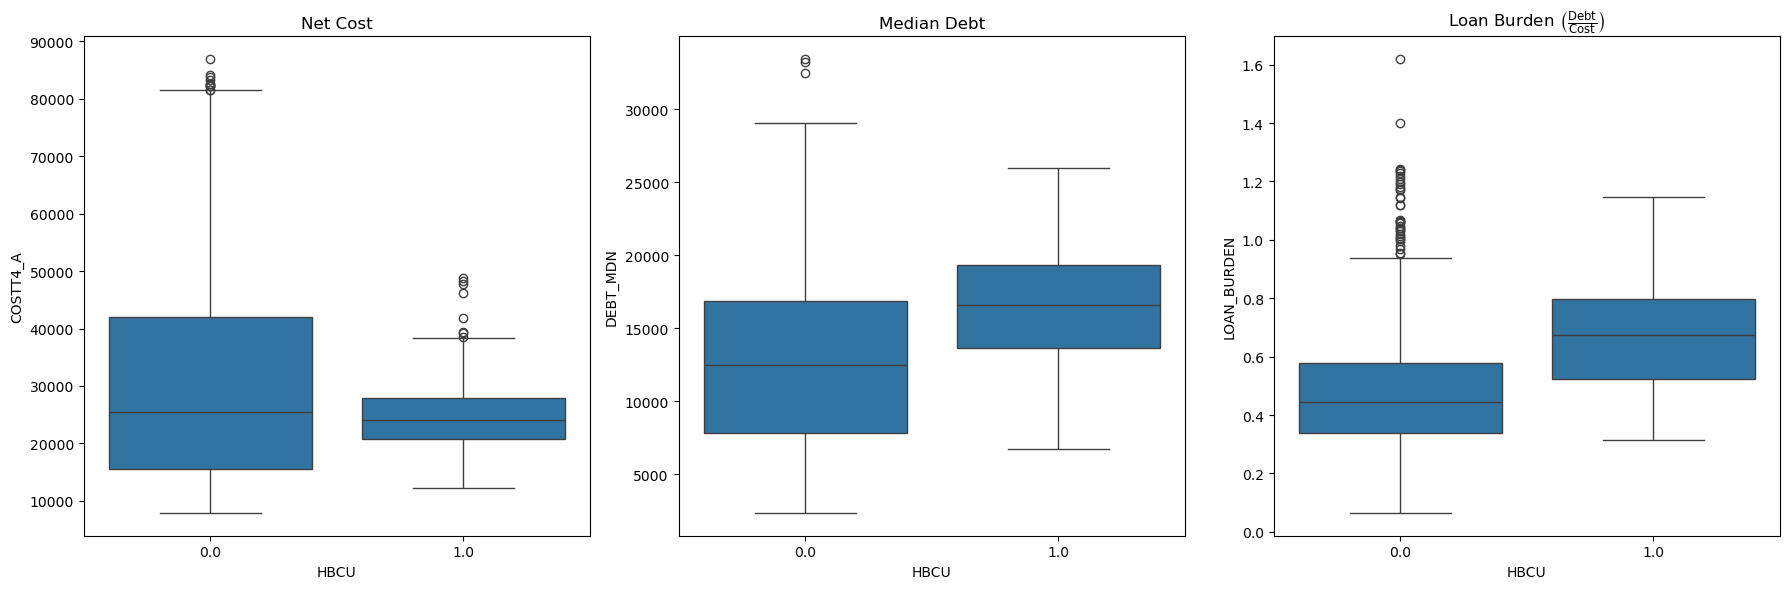

In [130]:
institution_data['DEBT_MDN'] = pd.to_numeric(institution_data['DEBT_MDN'])
institution_data['COSTT4_A'] = pd.to_numeric(institution_data['COSTT4_A'])
institution_data = institution_data.dropna(subset=['DEBT_MDN', 'COSTT4_A'])

institution_data['LOAN_BURDEN'] = institution_data['DEBT_MDN'] / institution_data['COSTT4_A']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='HBCU', y='COSTT4_A', data=institution_data, ax=axs[0])
axs[0].set_title('Net Cost')

sns.boxplot(x='HBCU', y='DEBT_MDN', data=institution_data, ax=axs[1])
axs[1].set_title('Median Debt')

sns.boxplot(x='HBCU', y='LOAN_BURDEN', data=institution_data, ax=axs[2])
axs[2].set_title(r'Loan Burden $\left(\frac{\text{Debt}}{\text{Cost}}\right)$')

plt.tight_layout()
plt.show()
